# Advanced layer types

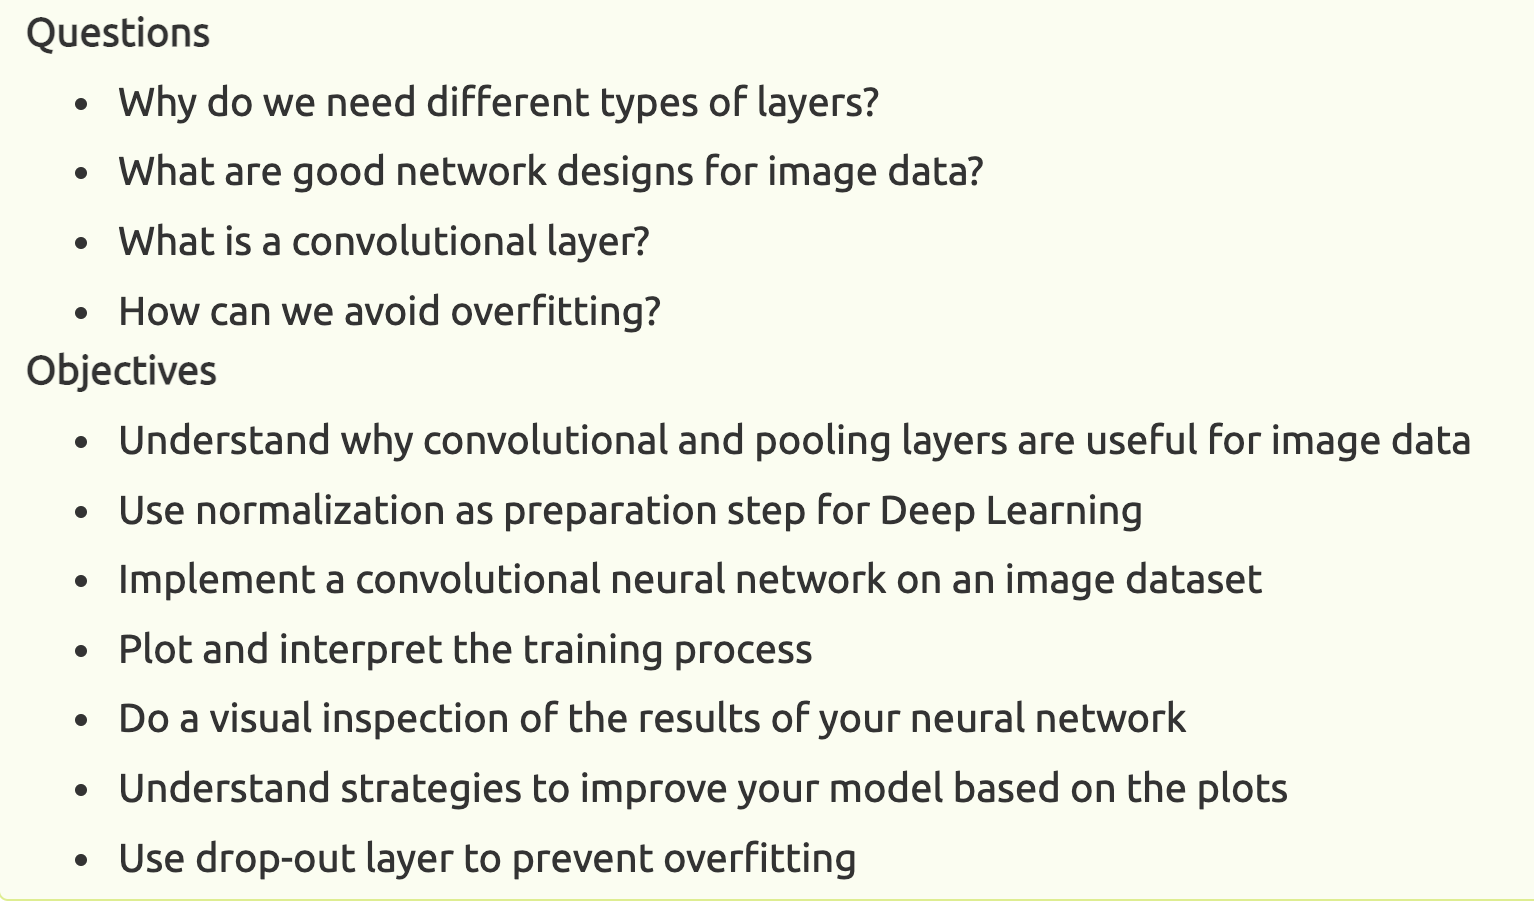

### Dense or fully connected layers

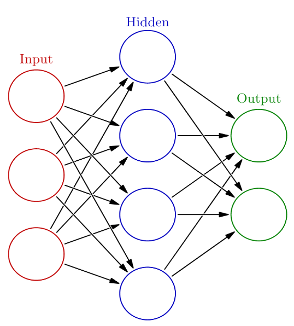

### Load the dataset

In [1]:
from tensorflow import keras

In [3]:
(train_images, train_labels), (test_images, test_labels) = \
keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 302s 2us/step


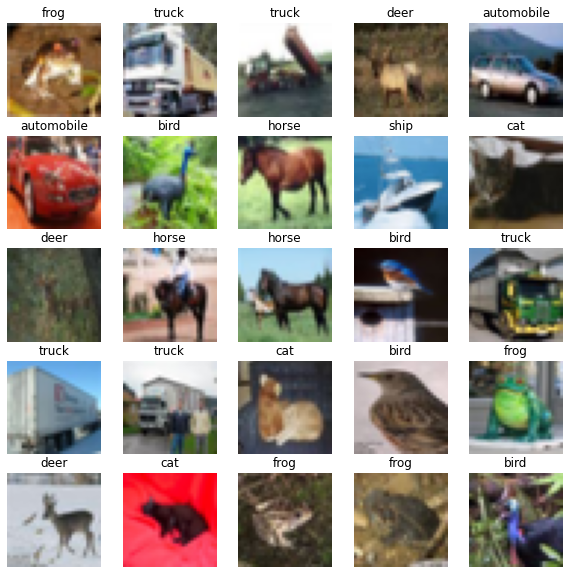

In [4]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.axis('off')
    plt.title(class_names[train_labels[i,0]])
plt.show()

### Goal
Predict what is in the image (airplane, automobile etc.)

### Inputs
The image
### Output
One of the ten classes

In [5]:
len(train_images)

50000

### Take a subsample of the data

In [6]:

n = 5000
train_images = train_images[:n]
train_labels = train_labels[:n]

### Exercise understand the data
Familiarize yourself with the CIFAR10 dataset. To start, consider the following questions:
- What is the dimension of a single data point? What do you think the dimensions mean?
- What is the range of values that your input data takes?
- What is the shape of the labels, and how many labels do we have?
- (Optional) Pre-trained models Step 4 of our 'deep learning workflow' is: 'Choose a pre-trained model or build a new architecture from scratch'. We are going to build a new architecture from scratch to get you familiar with the convolutional neural network basics. But in the real world you wouldn't do that. So the challenge is: Browse the web for (more) existing architectures or pre-trained models that are likely to work well on this type of data. Try to understand why they work well for this type of data.


In [7]:
train_images.shape

(5000, 32, 32, 3)

In [8]:
train_images.max(), train_images.min()

(255, 0)

In [9]:
train_labels.shape

(5000, 1)

In [10]:
train_labels.min(), train_labels.max()

(0, 9)

### Prepare the data

In [11]:
train_images = train_images / 255.0
test_images = test_images / 255.0

### 4. Finding a pretrained model or starting from scratch

### Intuition on convolution

In [12]:
dim = train_images.shape[1] * train_images.shape[2] * train_images.shape[3]

In [13]:
dim

3072

Question: Suppose we create a single dense layer with 100 hidden neurons that connect to the input pixels, how many parameters does this layer have?

In [14]:
dim * 100 + 100

307300

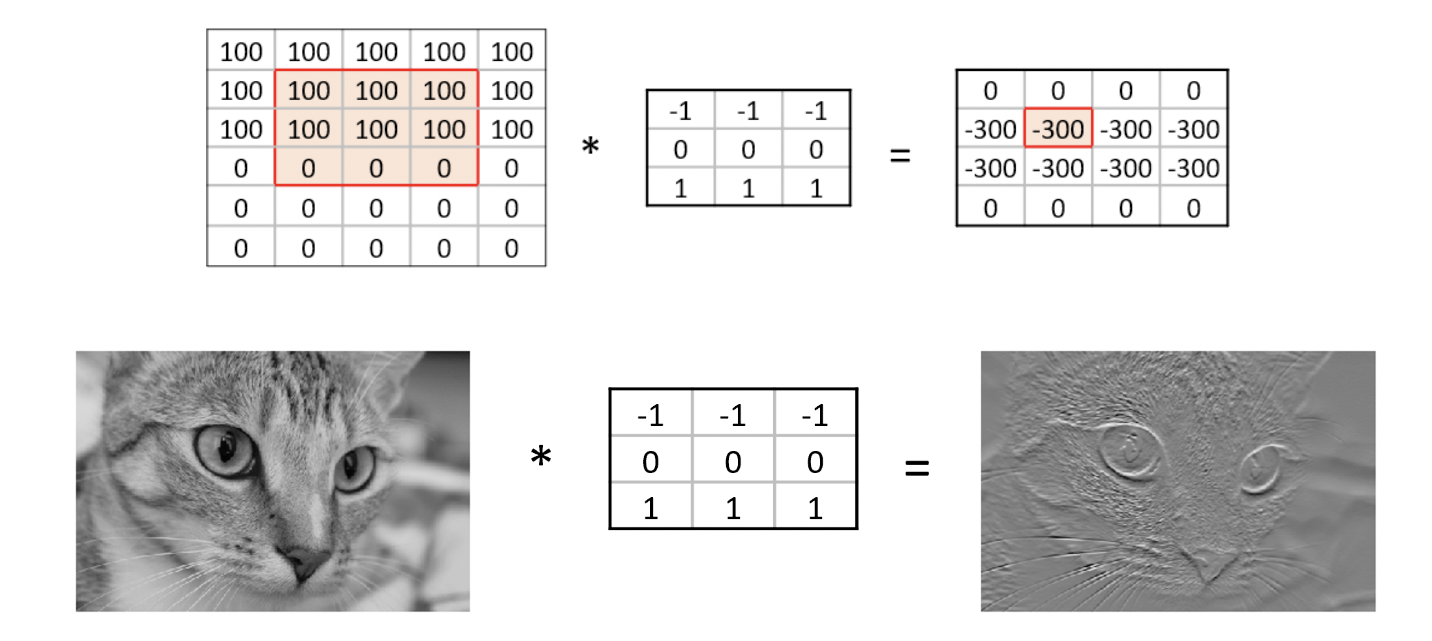

## Exercise: Convolutional neural networks
In groups of 3/4, answer the following questions. Write your answers in the collaborative document.

##### 1. Border pixels
What, do you think, happens to the border pixels when applying a convolution?
##### 2. Number of parameters
Suppose we apply a convolutional layer with 100 kernels of size 3 * 3 * 3 (the last dimension applies to the rgb channels) to our images of 32 * 32 * 3 pixels. How many parameters do we have? Assume, for simplicity, that the kernels do not use bias terms. Compare this to the answer of the previous exercise
##### 3. A small convolutional neural network
So let’s look at a network with a few convolutional layers. We need to finish with a Dense layer to connect the output cells of the convolutional layer to the outputs for our classes.
```python=
inputs = keras.Input(shape=train_images.shape[1:])
x = keras.layers.Conv2D(32, (3, 3), activation='relu')(inputs)
x = keras.layers.Conv2D(32, (3, 3), activation='relu')(x)
x = keras.layers.Flatten()(x)
outputs = keras.layers.Dense(10)(x)

model = keras.Model(inputs=inputs, outputs=outputs, name="cifar_model_small")

model.summary()
```
Inspect the network above:
* What do you think is the function of the `Flatten` layer?
* Which layer has the most parameters? Do you find this intuitive?

#### 4. (optional) A state-of-the-art network
Pick a model from https://paperswithcode.com/sota/image-classification-on-cifar-10 . Try to understand how it works.

In [15]:
inputs = keras.Input(shape=train_images.shape[1:])
x = keras.layers.Conv2D(32, (3, 3), activation='relu')(inputs)
x = keras.layers.Conv2D(32, (3, 3), activation='relu')(x)
x = keras.layers.Flatten()(x)
outputs = keras.layers.Dense(10)(x)

model = keras.Model(inputs=inputs, outputs=outputs, name="cifar_model_small")

model.summary()

Model: "cifar_model_small"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 10)                250890    
                                                                 
Total params: 261,034
Trainable params: 261,034
Non-trainable params: 0
_________________________________________________________________


In [16]:
inputs = keras.Input(shape=train_images.shape[1:])
x = keras.layers.Conv2D(32, (3, 3), activation='relu')(inputs)
x = keras.layers.MaxPooling2D((2, 2))(x)
x = keras.layers.Conv2D(32, (3, 3), activation='relu')(x)
x = keras.layers.Flatten()(x)
outputs = keras.layers.Dense(10)(x)

model = keras.Model(inputs=inputs, outputs=outputs, name="cifar_model_small")

model.summary()

Model: "cifar_model_small"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 32)        9248      
                                                                 
 flatten_1 (Flatten)         (None, 5408)              0         
                                                                 
 dense_1 (Dense)             (None, 10)                54090     
                                                 

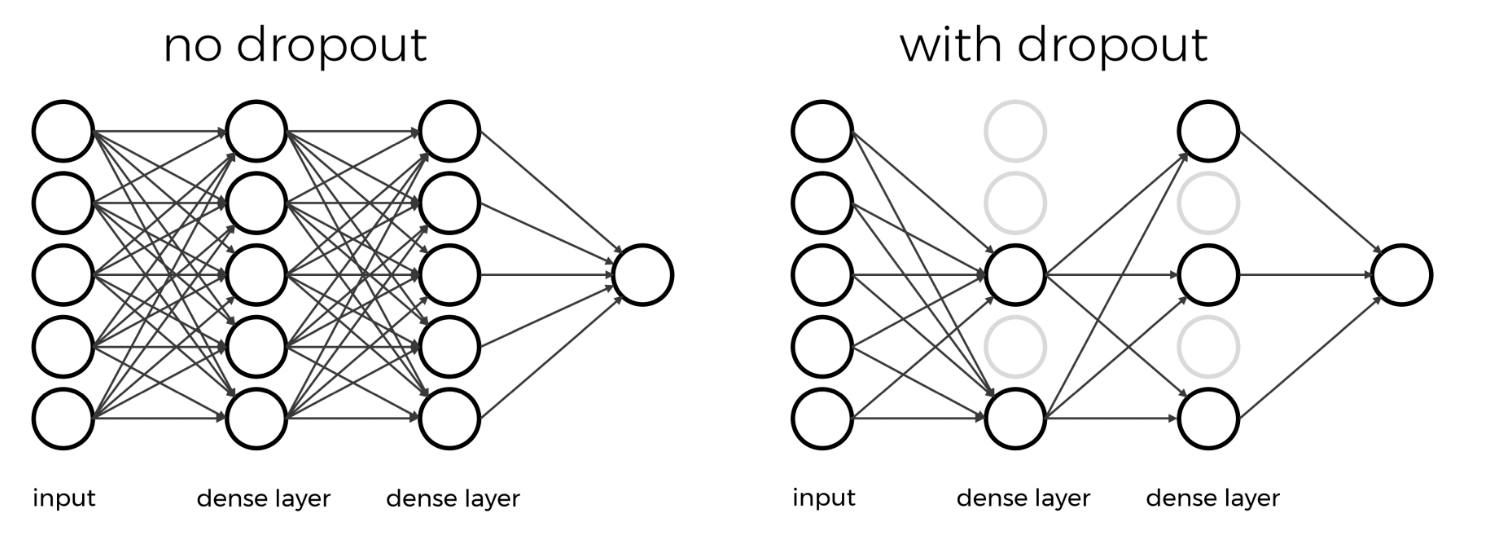

In [17]:
inputs = keras.Input(shape=train_images.shape[1:])
x = keras.layers.Conv2D(32, (3, 3), activation='relu')(inputs)
x = keras.layers.MaxPooling2D((2, 2))(x)
x = keras.layers.Conv2D(32, (3, 3), activation='relu')(x)
x = keras.layers.Dropout(0.2)(x)
x = keras.layers.Flatten()(x)
outputs = keras.layers.Dense(10)(x)

model = keras.Model(inputs=inputs, outputs=outputs, name="cifar_model_small")

model.summary()

Model: "cifar_model_small"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_4 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 13, 13, 32)        9248      
                                                                 
 dropout (Dropout)           (None, 13, 13, 32)        0         
                                                                 
 flatten_2 (Flatten)         (None, 5408)              0         
                                                 

### Exercise: Recap
Take a few minutes to write down your thoughts on what we learned about deep learning in this course:
* What questions do you still have?
* Whether there are any incremental improvements that can benefit your projects?
* What’s nice that we learnt but is overkill for your current work?